In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode

In [106]:
Tickets= pd.read_csv("/home/cjdavis/Downloads/il_parking_tickets_20180822/data/processed/parking_tickets.csv", nrows = 1e6)

In [167]:
def get_location_on_street(row):
    street_location = row["violation_location"].split(" ")
    if street_location[0] == "":
        street_location[0] = 0
    return int(street_location[0])
def get_street_name(row):
    street_name_list = row["violation_location"].split(" ")
    street_name = " ".join(street_name_list[1:])
    return street_name
def get_block_number(row):
    block_number = row["address"].split(" ")
    try:
        block = int(block_number[0])
    except ValueError:
        block = 0
    return block

In [168]:
def has_parked_standing(row):
    flag = 0
    violation_description = row["violation_description"].split(" ")
    parked_standing = ["PARKING", "STANDING", "PARKED/STANDING", "PARKING/STANDING"]
    if any(part in violation_description for part in parked_standing):
        flag = 1
    return flag
def has_expired_meter(row):
    flag = 0
    violation_description = row["violation_description"].split(" ")
    expired_meter = ["METER"]
    if any(part in violation_description for part in expired_meter):
        flag = 1
    return flag

In [169]:
Tickets["street_number"] = Tickets.apply(get_location_on_street,axis=1)
Tickets["street_name"] = Tickets.apply(get_street_name, axis=1)
Tickets["block_number"] = Tickets.apply(get_block_number,axis=1)
Tickets["has_parked_standing"] = Tickets.apply(has_parked_standing, axis=1)
Tickets["has_expired_meter"] = Tickets.apply(has_expired_meter, axis=1)
Tickets.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,notice_level,hearing_disposition,notice_number,officer,address,street_number,street_name,has_parked_standing,block_number,has_expired_meter
0,51551278,2007-01-01 00:00:00,6014 W 64TH ST,90ad622c3274c9bdc9d8c812b79a01d0aaf7479f2bd743...,IL,PAS,60638,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,...,SEIZ,NaN,5048648030,15227,"6000 w 64th st, chicago, il",6014,W 64TH ST,0,6000,0
1,51491256,2007-01-01 00:00:00,530 N MICHIGAN,bce4dc26b2c96965380cb2b838cdbb95632b7b57160612...,IL,PAS,606343801,0964150B,PARKING/STANDING PROHIBITED ANYTIME,18,...,NaN,NaN,0,18320,"500 n michigan, chicago, il",530,N MICHIGAN,1,500,0
2,50433524,2007-01-01 00:01:00,4001 N LONG,44641e828f4d894c883c07c566063c2d99d08f2c03b3d4...,IL,PAS,60148,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,16,...,VIOL,NaN,5079875240,3207,"4000 n long, chicago, il",4001,N LONG,0,4000,0
3,51430906,2007-01-01 00:01:00,303 E WACKER,eee50ca0d9be2debd0e7d45bad05b8674a6cf5b892230f...,IL,PAS,60601,0964110A,DOUBLE PARKING OR STANDING,152,...,DETR,Liable,5023379950,19410,"300 e wacker, chicago, il",303,E WACKER,1,300,0
4,51507779,2007-01-01 00:01:00,7 E 41ST ST,244116ca3eed4235b1f61f6d753d8c688be2a48c9fdd97...,IL,PAS,605053013,0976220B,SMOKED/TINTED WINDOWS PARKED/STANDING,2,...,SEIZ,NaN,5079891400,66396,"7 e 41st st, chicago, il",7,E 41ST ST,1,7,0


In [193]:
ExpiredMeter_streets = Tickets.loc[Tickets["has_expired_meter"] == 1 , "street_name"]
NoParking_streets = Tickets.loc[Tickets["has_parked_standing"] == 1 , "street_name"]

In [194]:
print(mode(ExpiredMeter_streets))
print(mode(NoParking_streets))

ModeResult(mode=array(['N CLARK'], dtype=object), count=array([14987]))
ModeResult(mode=array(['N CLARK'], dtype=object), count=array([4549]))


In [195]:
NoParking_on_NClark = Tickets.loc[(Tickets["street_name"] == "N CLARK") & (Tickets["has_parked_standing"] == 1) , "block_number"]
ExpiredMeter_on_NClark = Tickets.loc[(Tickets["street_name"] == "N CLARK") & (Tickets["has_expired_meter"] == 1) , "block_number"]

In [196]:
print(NoParking_on_NClark.head())
print(ExpiredMeter_on_NClark.head())

1128    1500
1682    2800
2334    1300
4224       1
5079    1900
Name: block_number, dtype: int64
5509    2600
5513    2600
5519    2700
5536    2700
5547    2700
Name: block_number, dtype: int64


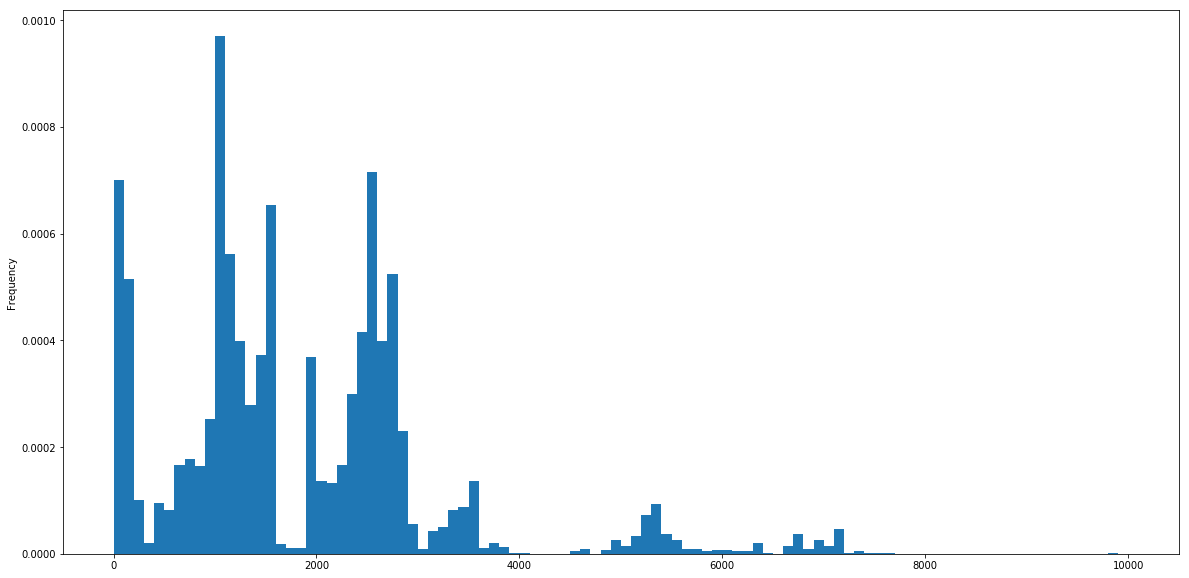

In [210]:
NoParking_on_NClark.plot.hist(bins = 100, figsize = (20,10), normed = True, range=[0, 1e4])

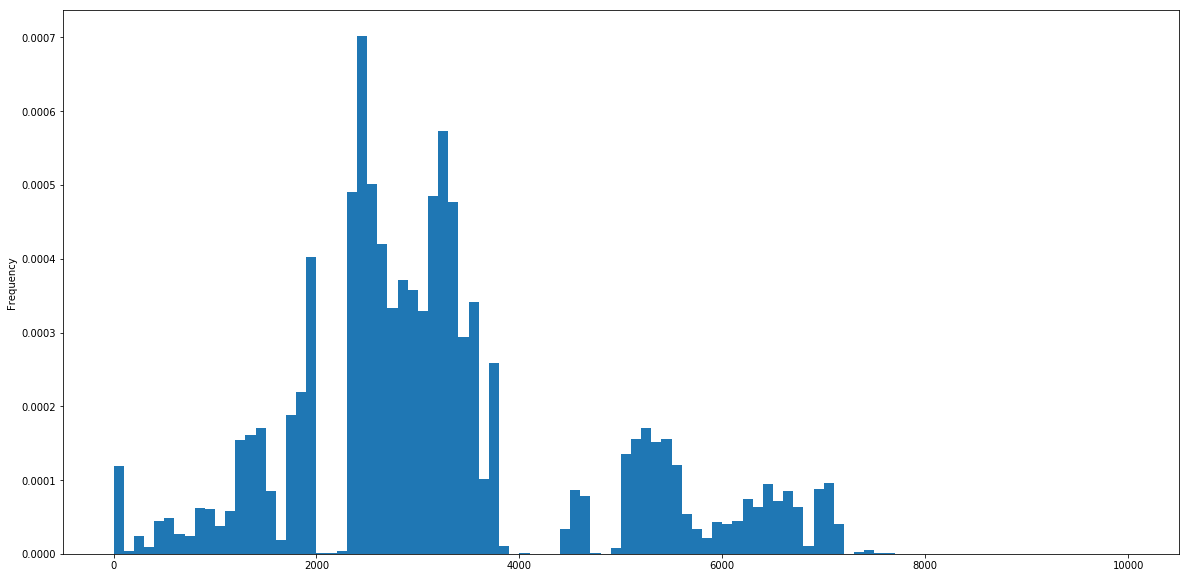

In [209]:
ExpiredMeter_on_NClark.plot.hist(bins = 100, figsize = (20,10), normed = True, range = [0, 1e4])